In [1]:
#Importing the necessary libraries
import numpy as np

#Visualisation library
import matplotlib.pyplot as plt
%matplotlib inline


import os
import cv2

import warnings
warnings.filterwarnings('ignore')

import random

In [2]:
datadir='C:/Users/vignesh/Coding/Skillovilla course/Module 6/CNN/Face mask'
labels=['with_mask','without_mask']

In [3]:
IMG_SIZE=100

In [4]:
feature_with_labels=[]

def create_data():
    for label in labels:
        path = os.path.join(datadir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            feature_with_labels.append([new_array,class_num])
create_data()

In [5]:
random.shuffle(feature_with_labels)

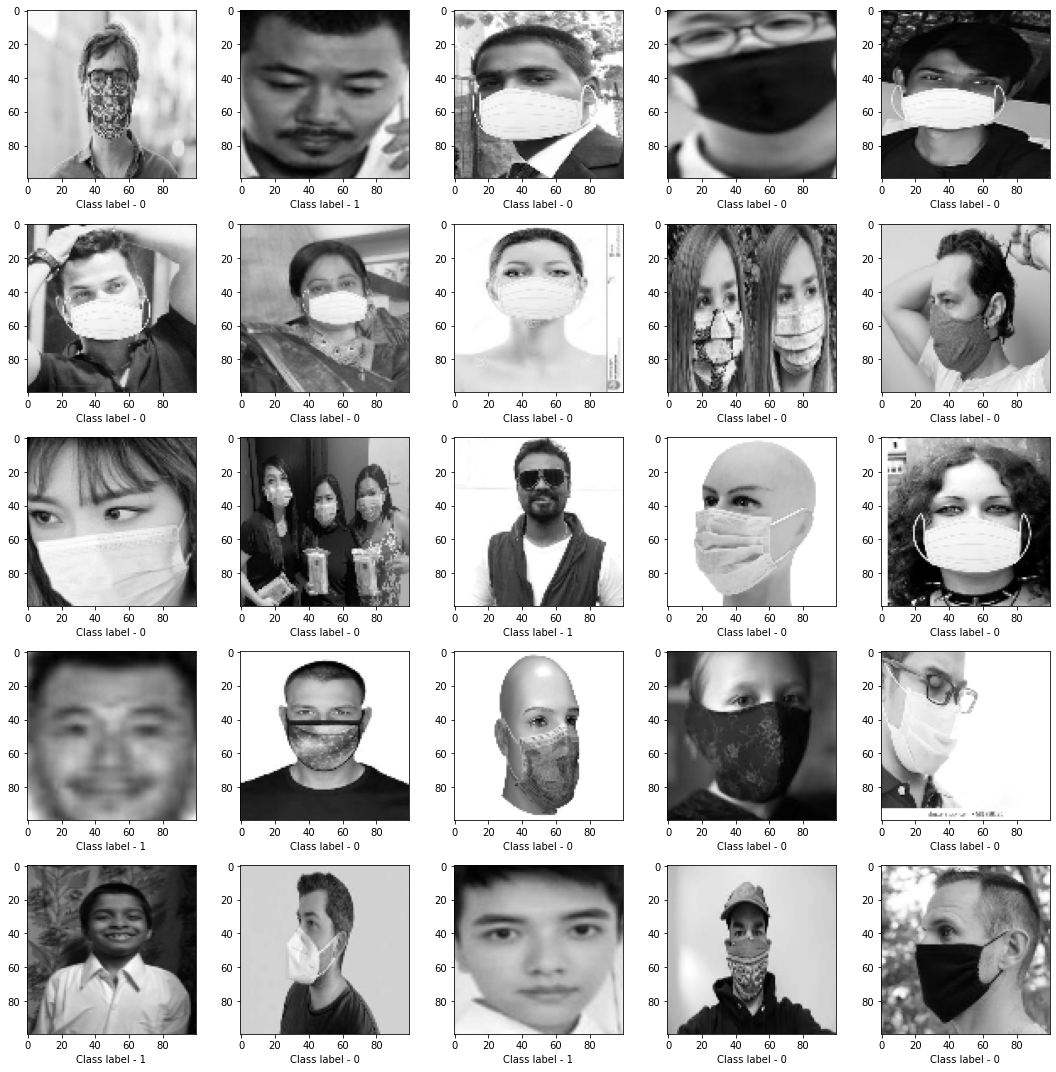

In [6]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(feature_with_labels[i][0],cmap='gray')
    plt.xlabel('Class label - {}'.format(feature_with_labels[i][1]))
plt.tight_layout()
plt.show()

In [7]:
l=[]
for i,j in feature_with_labels:
    l.append(j)
print("Count of class 1(without mask) is {}.\nCount of class 0(with mask) is {}.".format(l.count(1),l.count(0)))

Count of class 1(without mask) is 1990.
Count of class 0(with mask) is 3725.


In [8]:
# Importing all necessary libraries
from tensorflow import keras
#Importing data genarator for generating data which will reduce the computational complexity
from keras.preprocessing.image import ImageDataGenerator
#importing sequential model for modelling
from keras.models import Sequential
#Importing convolutional layers and pooling for the feature selecting and maximum info/ we can extract
from keras.layers import Conv2D, MaxPooling2D
#importing dropout to drop the overlearned neurons to prevent over fitting
#Flatten is used to convert the data to 1-D
from keras.layers import Activation, Dropout, Flatten, Dense
#Importing backend for neural network modelling
from keras import backend as K

In [9]:
X=[]
y=[]

In [10]:
for feature,label in feature_with_labels:
    X.append(feature)
    y.append(label)

In [11]:
X[0][0].shape

(100,)

In [12]:
type(X)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [13]:
X=X/255

In [14]:
y=np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(100,100,1)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=10,epochs=20)

Epoch 1/20
458/458 [==============================] - 22s 45ms/step - loss: 0.5214 - accuracy: 0.7303
Epoch 2/20
458/458 [==============================] - 20s 45ms/step - loss: 0.3421 - accuracy: 0.8631
Epoch 3/20
458/458 [==============================] - 20s 45ms/step - loss: 0.2530 - accuracy: 0.8976
Epoch 4/20
458/458 [==============================] - 20s 45ms/step - loss: 0.2045 - accuracy: 0.9195
Epoch 5/20
458/458 [==============================] - 20s 45ms/step - loss: 0.1764 - accuracy: 0.9355
Epoch 6/20
458/458 [==============================] - 20s 45ms/step - loss: 0.1602 - accuracy: 0.9385
Epoch 7/20
458/458 [==============================] - 21s 45ms/step - loss: 0.1429 - accuracy: 0.9479
Epoch 8/20
458/458 [==============================] - 20s 45ms/step - loss: 0.1216 - accuracy: 0.9508
Epoch 9/20
458/458 [==============================] - 21s 45ms/step - loss: 0.1179 - accuracy: 0.9565
Epoch 10/20
458/458 [==============================] - 21s 46ms/step - loss: 0.098

In [18]:
y_pred=model.predict(X_test)
y_pred=np.round(y_pred)

36/36 [==============================] - 1s 26ms/step


In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred)

array([[720,  16],
       [ 32, 375]], dtype=int64)

In [20]:
accuracy_score(y_test,y_pred)

0.958005249343832

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       736
           1       0.96      0.92      0.94       407

    accuracy                           0.96      1143
   macro avg       0.96      0.95      0.95      1143
weighted avg       0.96      0.96      0.96      1143



In [22]:
tf.keras.models.save_model(model,'face_mask.hdf5')